# A3 - Jimmy Carrero & Sebastian Millán

In [ ]:
%pip install pandas scikit-learn numpy matplotlib scipy imageio
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib as mt
import scipy as sp

## Eigenface for face recognition

### (a) Download and unzip _The Face Dataset_

Download The Face Dataset and unzip [faces.zip](https://drive.google.com/file/d/1CkbjpKFZIvFCSdS3BCSHUhXSSarYbqJF/view?usp=sharing). You will find a folder called
images which contains all the training and test images; train.txt and test.txt
specify the training set and test (validation) set split respectively, each line gives an
image path and the corresponding label.

In [ ]:
from zipfile import ZipFile

# Load the zip file and create a zip object
with ZipFile("./faces.zip", 'r') as zip_ref:
    # Extract all the files present in the zip to a specific location
    zip_ref.extractall("./")

### (b) Load the training dataset into a matrix

Load the training set into a matrix X: there are 540 training images in total,
each has 50 ×50 pixels that need to be concatenated into a 2500-dimensional vector.
So the size of X should be 540 ×2500, where each row is a flattened face image. Pick
a face image from X and display that image in grayscale. Do the same thing for the
test set. The size of matrix Xtest for the test set should be 100 ×2500

In [ ]:
import numpy as np
import imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
test_labels, test_data = [], []

# Open the training data file
for line in open('./faces/train.txt'):
    # Read the image
    im = imageio.imread(line.strip().split()[0])
    
    # Reshape the image to 2500-dimensional vector and append to data
    train_data.append(im.reshape(2500,))
    
    # Append the label
    train_labels.append(line.strip().split()[1])

# Convert the lists to numpy arrays
train_data = np.array(train_data, dtype=float)
train_labels = np.array(train_labels, dtype=int)

# Print the shapes of the data and labels
print(train_data.shape, train_labels.shape)

# Train dataset
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

In [ ]:
# Open the training data file
for line in open('./faces/test.txt'):
    # Read the image
    im = imageio.imread(line.strip().split()[0])
    
    # Reshape the image to 2500-dimensional vector and append to data
    test_data.append(im.reshape(2500,))
    
    # Append the label
    test_labels.append(line.strip().split()[1])

# Convert the lists to numpy arrays -------
test_data = np.array(test_data, dtype=float)
test_labels = np.array(test_labels, dtype=int)

# Print the shapes of the data and labels
print(test_data.shape, test_labels.shape)

# Test dataset
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

### (c) Compute the average face µ from the whole training

Compute the average face µ from the whole training set by summing up
every row in X then dividing by the number of faces. Display the average face as a
grayscale image.

In [ ]:
# Compute the average face (mean of all training images)
mu = np.mean(train_data, axis=0)  # Mean across all images (row-wise)

# Reshape and display the average face
plt.imshow(mu.reshape(50, 50), cmap=cm.Greys_r)
plt.title("Average Face")
plt.show()

### (d) Subtract average face µ from every row in X

Subtract average face µ from every row in X. That is, $x_i = x_i−µ$, where
$x_i$ is the i-th row of X. Pick a face image after mean subtraction from the new X
and display that image in grayscale. Do the same thing for the set Xtest using the
pre-computed average face µ in (c).

In [ ]:
# Test dataset
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Before Mu substraction")
plt.show()

muless_train = train_data - mu

# Test dataset
plt.imshow(muless_train[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("After Mu substraction")
plt.show()

In [ ]:
# Test dataset
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Before Mu substraction")
plt.show()

muless_test = test_data - mu

# Test dataset
plt.imshow(muless_test[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("After Mu substraction")
plt.show()

### (e) Perform eigendecompostion

Perform eigendecomposition on $X^TX= VΛV^T$ to get eigenvectors $V^T$, where each row of $V^T$ has the same dimension as the face image. We refer to $v_i$, the i-th row of $V_T$, as the i-th eigenface. Display the first 10 eigenfaces as images in grayscale.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Compute covariance matrix X^T X. cov_matrix = (X^T * X)
cov_matrix = np.dot(muless_train.T, muless_train)  # Shape (2500, 2500)

# (X^T * X) = V * A * V^T
# eigenvalues = A
# eigenvectors = V 
# Compute eigenvalues and eigenvectors (https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]  # Columns are eigenfaces


In [ ]:
# Extract the top 10 eigenfaces (first 10 columns)
top_10_eigenfaces = eigenvectors[:, :10]  # Shape (2500, 10)

# Plot the first 10 eigenfaces
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2 rows, 5 columns

for i, ax in enumerate(axes.flat):
    ax.imshow(top_10_eigenfaces[:, i].reshape(50, 50), cmap=cm.Greys_r)
    ax.set_title(f"Eigenface {i+1}")
    ax.axis("off")  # Hide axis ticks

plt.tight_layout()
plt.show()


### (f) Write a function to generate r-dimensional feature matrix

The top r eigenfaces $V^T[:,r :] = \{v_1,v_2,...,v_r\}$ span an r-dimensional linear
subspace of the original image space called face space, whose origin is the average face µ,
and whose axes are the eigenfaces $\{v_1,v_2,...,v_r\}$. Therefore, using the top r eigenfaces
$\{v_1,v_2,...,v_r\}$, we can represent a 2500-dimensional face image z as an r-dimensional
feature vector f. Define $f= V^T[:,r:]z = [v_1,v_2,...,v_r]^Tz$. Write a function to generate
r-dimensional feature matrix $F$ and $F_{test}$ for training images $X$ and test images $X_{test}$,
respectively (to get $F$, multiply $X$ to the transpose of first $r$ rows of $V_T$,
$F$ should have the same number of rows as $X$ and $r$ columns; similarly for $X_{test}$).

In [ ]:
def compute_feature_matrix(X, X_test, V_T, r):
    """
    Compute r-dimensional feature matrices F and F_test.

    Parameters:
    - X: Training images matrix (num_samples x 2500)
    - X_test: Test images matrix (num_test_samples x 2500)
    - V_T: Transposed eigenvector matrix (2500 x 2500)
    - r: Number of top eigenfaces to use

    Returns:
    - F: Feature matrix for training data (num_samples x r)
    - F_test: Feature matrix for test data (num_test_samples x r)
    """
    V_r = V_T[:r, :]  # Select the first r eigenfaces (rows)
    F = np.dot(X, V_r.T)  # Project training data onto face space
    F_test = np.dot(X_test, V_r.T)  # Project test data onto face space

    return F, F_test

In [ ]:
F, F_test = compute_feature_matrix(muless_train, muless_test, eigenvectors.T, 10)

### (g) Train, classify and report

For this problem, you are welcome to use libraries such as **scikit-learn**
to perform logistic regression. Extract training and test features for $r = 10$. Train a
Logistic Regression model using $F$ and test on $F_test$. Report the classification accuracy
on the test set. Plot the classification accuracy on the test set as a function of r when
$r= 1,2,...,200$. Use _one-vs-rest_ logistic regression, where a classifier is trained for each
possible output label. Each classifier is trained on faces with that label as positive data
and all faces with other labels as negative data. sklearn calls this the _ovr_ mode.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# Use OneVsRestClassifier explicitly
def train_logistic_regression(X, X_test, train_labels, test_labels):
    """
    Train and evaluate logistic regression on given features.

    Parameters:
    - F: Feature matrix for training data
    - F_test: Feature matrix for test data
    - train_labels: Training labels
    - test_labels: Test labels

    Returns:
    - accuracy: Classification accuracy on test set
    """

    model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=10000))
    model.fit(X, train_labels)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy


# Evaluate for r = 10
r = 10
F, F_test = compute_feature_matrix(muless_train, muless_test, eigenvectors.T, r)
accuracy_r10 = train_logistic_regression(F, F_test, train_labels, test_labels)
print(f"Accuracy for r = 10: {accuracy_r10:.4f}")

# Accuracy as a function of r (1 to 200)
r_values = range(1, 201)
accuracies = []

for r in r_values:
    F, F_test = compute_feature_matrix(muless_train, muless_test, eigenvectors.T, r)
    acc = train_logistic_regression(F, F_test, train_labels, test_labels)
    accuracies.append(acc)

# Plot results
plt.plot(r_values, accuracies, marker='o')
plt.xlabel("Number of Eigenfaces (r)")
plt.ylabel("Classification Accuracy")
plt.title("Classification Accuracy vs. Number of Eigenfaces")
plt.grid()
plt.show()


## Implement EM algorithm

In this problem, you will implement a bimodal GMM model fit using the EM algorithm. Bimodal means that the distribution has two peaks, or that the data is a mixture of two groups. If you want, you can assume the covariance matrix is diagonal (i.e., it has the form diag($\sigma^{2}_{1} ,\sigma^{2}_{2} ,...,\sigma^{2}_{d}$) for scalars $\sigma_j$) and you can randomly initialize the parameters of the model.

You will need to use the [Old Faithful Geyser Dataset](https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat). The data file contains 272 observations of the waiting time between eruptions and the duration of each eruption for the Old Faithful geyser in Yellowstone National Park.

You should do this without calling the [Gaussian Mixture library](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) in scikit-learn. You can use numpy or scipy for matrix calculations or generating Gaussian distributions.

### (a) Treat each data entry as a 2-dimensional feature vector. Parse and plot all data points on the 2-D plane.

In [ ]:
!wget https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

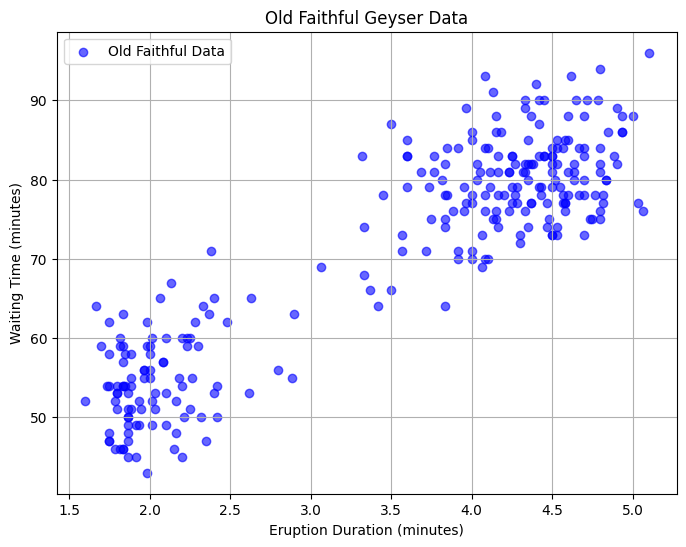

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('faithful.dat', skiprows=25, sep=r'\s+')
X = data[['eruptions', 'waiting']].values  # Eruptions and Waiting times

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='b', alpha=0.6, label="Old Faithful Data")
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.title("Old Faithful Geyser Data")
plt.legend()
plt.grid()
plt.show()

### (b) Write the expression for $P_{θ_t} (z = k|x)$, which is the posterior of each data point $x^{(i)}$

Recall that EM learns the parameter θ of a Gaussian mixture model $P_θ(x,z)$
over a dataset $D = \{x^{(i)}|i = 1,2,...,n\}$ by performing the E-step and the M-step for
t= 0,1,2,.... We repeat the E-step and M-step until convergence.
In the E-step, for each $x^{(i)} \in D$, we compute a vector of probabilities $p_{θ_t} (z = k|x)$ for
the event that each x(i) originates from a cluster k given the current set of parameters
$θ_t$.

Write the expression for $P_{θ_t} (z = k|x)$, which is the posterior of each data point $x^{(i)}$.
Recall that by Bayes’ rule,

$$
P_{\theta_t}(z = k | x^{(i)}) = \frac{P_{\theta_t}(z = k) P_{\theta_t}(x^{(i)} | z = k)}{\sum_{l=1}^{K} P_{\theta_t}(z = l) P_{\theta_t}(x^{(i)} | z = l)}
$$

Note that we have seen this formula in class. We are asking you to write it down and
try to understand it before implementing it in part (e).

#### **Component explanation**

The formula that we discussed in class for calculating the probability that a data point $x^{(i)}$ belongs to cluster $k$ in a Gaussian Mixture Model (GMM) is:

$$
P_{\theta_t}(z = k | x^{(i)}) = \frac{P_{\theta_t}(z = k) P_{\theta_t}(x^{(i)} | z = k)}{\sum_{l=1}^{K} P_{\theta_t}(z = l) P_{\theta_t}(x^{(i)} | z = l)}
$$

where:  
- $P_{\theta_t}(z = k)$ is the prior probability (or mixing coefficient) of cluster $k$. This represents the proportion of points expected to belong to cluster $k$.  
- $P_{\theta_t}(x^{(i)} | z = k)$ is the likelihood, which we assume follows a Gaussian (Normal) distribution:

  $$
  P_{\theta_t}(x^{(i)} | z = k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x^{(i)} - \mu_k)^T \Sigma_k^{-1} (x^{(i)} - \mu_k) \right)
  $$

  where:
  - $\mu_k$ is the **mean** of cluster $k$,
  - $\Sigma_k$ is the **covariance matrix** of cluster $k$, and
  - $d$ is the dimensionality of the data (in this case, $d = 2$ since we have two features: eruption time and waiting time).  

- The denominator sums over all $K$ clusters to normalize the probabilities, ensuring that they sum to 1.  

### (c) Write down the formula for $\mu_k$, $\Sigma_k$ and for the parameters $\phi$ at the M-step

In the M-step, we compute new parameters $θ_t+1$. Our goal is to find $µ_k$,$Σ_k$
and $ϕ_k$ that optimize 

$$ 
\text{max}_\theta(\Sigma_{k=1}^{K}\Sigma_{x \in D} P_\theta (z_k | x) \text{log}P_theta(x | z_k) + \Sigma_{k=1}^{K}\Sigma_{x \in D} P_{\theta_t} (z_k | x) \text{log}P_theta(z_k))
$$

Write down the formula for $µ_k$,$Σ_k$, and for the parameters $ϕ$ at the M-step (we have
also seen these formulas in class).

$$

\text{max}_\theta(\Sigma_{k=1}^{K}\Sigma_{x \in D} P_{\theta} (z_k | x) \text{log}P_\theta(x | z_k) + \Sigma_{k=1}^{K}\Sigma_{x \in D} P_{\theta_t} (z_k | x) \text{log}P_theta(z_k))

$$

#### **Component Explanation**

In the **M-step**, we update the parameters $ \mu_k $, $ \Sigma_k $, and $ \phi_k $ to maximize the expected complete-data log-likelihood. The formulas are derived as follows:


1. **Mean $ \mu_k $:**
The mean $ \mu_k $ for cluster $ k $ is updated as the weighted average of all data points, where the weights are the posterior probabilities $ P_{\theta_t}(z = k | x) $:

$$
\mu_k = \frac{\sum_{x \in D} P_{\theta_t}(z = k | x) \cdot x}{\sum_{x \in D} P_{\theta_t}(z = k | x)}
$$

2. **Covariance $ \Sigma_k $:**
The covariance matrix $ \Sigma_k $ for cluster $ k $ is updated as the weighted covariance of all data points, where the weights are the posterior probabilities $ P_{\theta_t}(z = k | x) $:

$$
\Sigma_k = \frac{\sum_{x \in D} P_{\theta_t}(z = k | x) \cdot (x - \mu_k)(x - \mu_k)^T}{\sum_{x \in D} P_{\theta_t}(z = k | x)}
$$

3. **Mixing Coefficient $ \phi_k $:**
The mixing coefficient $ \phi_k $ for cluster $ k $ is updated as the average of the posterior probabilities $ P_{\theta_t}(z = k | x) $ over all data points:

$$
\phi_k = \frac{1}{n} \sum_{x \in D} P_{\theta_t}(z = k | x)
$$

Summary of M-step Updates:
- **$ \mu_k $**: Weighted average of data points.
- **$ \Sigma_k $**: Weighted covariance of data points.
- **$ \phi_k $**: Average posterior probability for cluster $ k $.

### (d) Implement and run the EM Algorithm

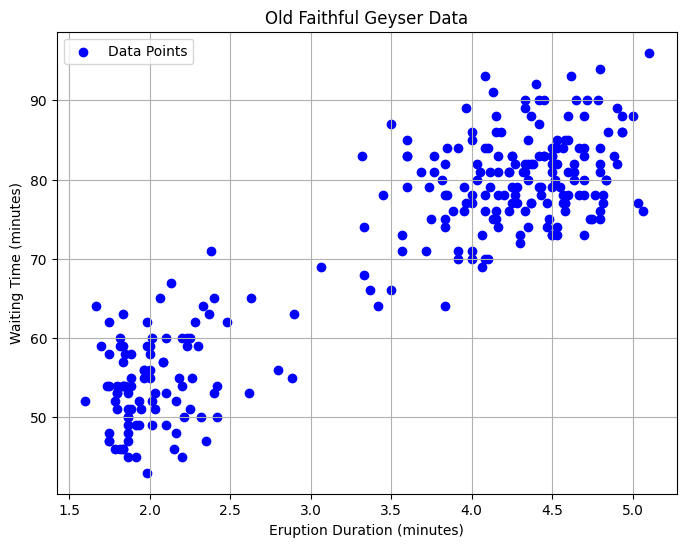

In [246]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt("faithful.dat", skiprows=26)  # Skip the first 26 rows (header and metadata)
data = data[:, 1:]
eruptions = data[:, 0]  # First column: eruption duration
waiting = data[:, 1]  # Second column: waiting time

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(eruptions, waiting, c="blue", marker="o", label="Data Points")
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.title("Old Faithful Geyser Data")
plt.legend()
plt.grid()
plt.show()

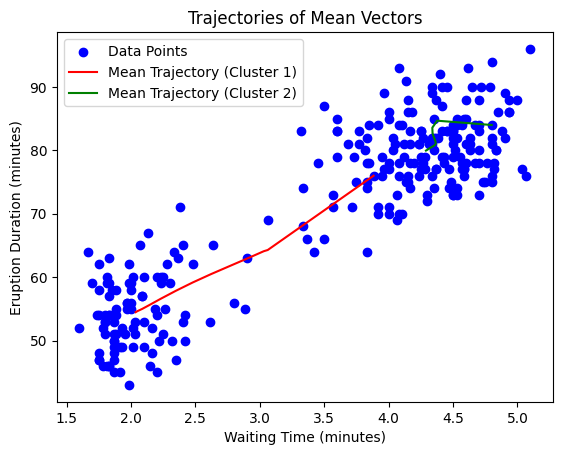

In [263]:
# Set a seed for reproducibility
np.random.seed(35)

# Initialize parameters
def initialize_parameters(data, K):
    n, d = data.shape
    phi = np.ones(K) / K  # Mixing coefficients
    mu = data[np.random.choice(n, K, replace=False)]  # Randomly select K data points as initial means
    sigma = [np.eye(d) for _ in range(K)]  # Initialize covariance matrices as identity matrices
    return phi, mu, sigma

# E-step: Compute posterior probabilities
def e_step(data, phi, mu, sigma):
    n, d = data.shape
    K = len(phi)
    posterior = np.zeros((n, K))
    
    for k in range(K):
        diff = data - mu[k]
        inv_sigma = np.linalg.inv(sigma[k])
        exp_term = np.exp(-0.5 * np.sum(diff @ inv_sigma * diff, axis=1))
        posterior[:, k] = phi[k] * exp_term / np.sqrt((2 * np.pi) ** d * np.linalg.det(sigma[k]))
    
    posterior /= posterior.sum(axis=1, keepdims=True)  # Normalize
    return posterior

# M-step: Update parameters
def m_step(data, posterior):
    n, d = data.shape
    K = posterior.shape[1]
    
    phi = posterior.mean(axis=0)
    mu = np.zeros((K, d))
    sigma = [np.zeros((d, d)) for _ in range(K)]
    
    for k in range(K):
        mu[k] = np.sum(posterior[:, k].reshape(-1, 1) * data, axis=0) / posterior[:, k].sum()
        diff = data - mu[k]
        sigma[k] = (posterior[:, k].reshape(-1, 1) * diff).T @ diff / posterior[:, k].sum()
    
    return phi, mu, sigma

# EM Algorithm
def em_algorithm(data, K, max_iter=100, tol=1e-6):
    phi, mu, sigma = initialize_parameters(data, K)
    log_likelihood_prev = -np.inf
    mu_trajectory = [mu.copy()]
    
    for iteration in range(max_iter):
        # E-step
        posterior = e_step(data, phi, mu, sigma)
        
        # M-step
        phi, mu, sigma = m_step(data, posterior)
        mu_trajectory.append(mu.copy())
        
        # Compute log-likelihood
        log_likelihood = 0
        for k in range(K):
            diff = data - mu[k]
            inv_sigma = np.linalg.inv(sigma[k])
            exp_term = np.exp(-0.5 * np.sum(diff @ inv_sigma * diff, axis=1))
            log_likelihood += np.sum(np.log(phi[k] * exp_term / np.sqrt((2 * np.pi) ** d * np.linalg.det(sigma[k]))))
        
        # Check for convergence
        if np.abs(log_likelihood - log_likelihood_prev) < tol:
            break
        log_likelihood_prev = log_likelihood
    
    return phi, mu, sigma, mu_trajectory

# Run EM algorithm
K = 2
phi, mu, sigma, mu_trajectory = em_algorithm(data, K)

# Plot trajectories of mean vectors
mu_trajectory = np.array(mu_trajectory)
plt.scatter(data[:, 0], data[:, 1], c="blue", marker="o", label="Data Points")
plt.plot(mu_trajectory[:, 0, 0], mu_trajectory[:, 0, 1], "r-", label="Mean Trajectory (Cluster 1)")
plt.plot(mu_trajectory[:, 1, 0], mu_trajectory[:, 1, 1], "g-", label="Mean Trajectory (Cluster 2)")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Eruption Duration (minutes)")
plt.title("Trajectories of Mean Vectors")
plt.legend()
plt.show()

### (e) Comparison with K-means clustering

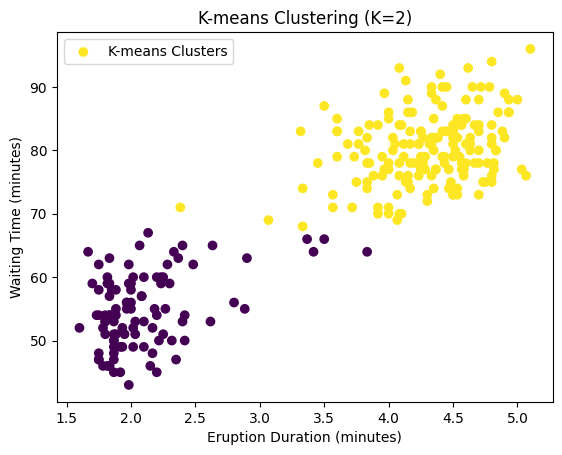

In [248]:
from sklearn.cluster import KMeans

# Run K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans_labels = kmeans.labels_

# Plot K-means clusters
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap="viridis", marker="o", label="K-means Clusters")
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.title("K-means Clustering (K=2)")
plt.legend()
plt.show()